In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
oil = pd.read_csv('./data/fish_oil2.csv')

# EXPLORACIÓN DE DATOS

In [4]:
# muestra,acido_graso_omega3,acido_graso_omega6,vitamina_a,vitamina_e
oil.head()

,sample,omega3_fatty_acid,omega6_fatty_acid,vitamin_a,vitamin_e
0,1,12.5,5.2,120,15
1,2,11.2,4.8,110,12
2,3,10.8,4.5,100,11
3,4,13.1,5.5,125,17
4,5,12.3,5.0,115,14


In [5]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sample             15 non-null     int64  
 1   omega3_fatty_acid  15 non-null     float64
 2   omega6_fatty_acid  15 non-null     float64
 3   vitamin_a          15 non-null     int64  
 4   vitamin_e          15 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 728.0 bytes


# Análisis estadístico

In [18]:
statistics = oil.describe()
statistics

,sample,omega3_fatty_acid,omega6_fatty_acid,vitamin_a,vitamin_e,year,month,date
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15
mean,8.000000,11.946667,5.046667,111.933333,13.333333,2022.133333,6.533333,2022-08-05 04:48:00
min,1.000000,10.300000,4.300000,95.000000,9.000000,2021.000000,1.000000,2021-02-01 00:00:00
25%,4.500000,11.450000,4.750000,106.000000,12.000000,2021.000000,3.500000,2021-09-15 12:00:00
50%,8.000000,12.000000,5.100000,112.000000,13.000000,2022.000000,7.000000,2022-11-01 00:00:00
75%,11.500000,12.550000,5.350000,119.000000,15.000000,2023.000000,8.500000,2023-07-01 00:00:00
max,15.000000,13.500000,5.700000,130.000000,18.000000,2023.000000,12.000000,2023-12-01 00:00:00
std,4.472136,0.931870,0.415532,10.102805,2.526055,0.915475,3.583029,NaN


# Visualización de datos

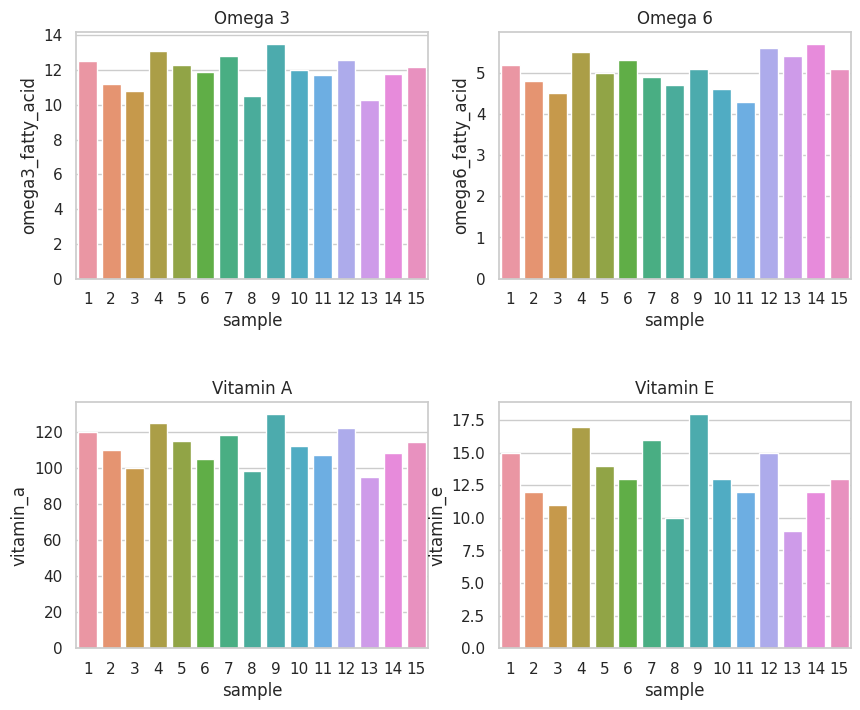

In [7]:
sns.set(style = 'whitegrid')
fig, axes = plt.subplots(2,2, figsize = (10,8))
plt.subplots_adjust(hspace = 0.5)
sns.barplot(ax = axes[0,0], data = oil , x = 'sample' , y = 'omega3_fatty_acid')
axes[0,0].set_title('Omega 3')
sns.barplot(ax = axes[0,1], data = oil , x = 'sample' , y = 'omega6_fatty_acid')
axes[0,1].set_title('Omega 6')
sns.barplot(ax = axes[1,0], data = oil , x = 'sample' , y = 'vitamin_a')
axes[1,0].set_title('Vitamin A')
sns.barplot(ax = axes[1,1], data = oil , x = 'sample' , y = 'vitamin_e')
axes[1,1].set_title('Vitamin E')
plt.show()

# Análisis comparativo

In [20]:
# Media Aritmetica
comparison = oil.mean()
comparison

sample                               8.0
omega3_fatty_acid              11.946667
omega6_fatty_acid               5.046667
vitamin_a                     111.933333
vitamin_e                      13.333333
year                         2022.133333
month                           6.533333
date                 2022-08-05 04:48:00
dtype: object

# Análisis de tendencias

In [9]:
oil['year'] = np.random.choice([2023,2022,2021] , size = len(oil))
oil['month'] = np.random.choice(range(1,13) , size = len(oil))
oil['date'] = pd.to_datetime(oil[['year', 'month']].assign(day = 1))
oil.sort_values('date')

,sample,omega3_fatty_acid,omega6_fatty_acid,vitamin_a,vitamin_e,year,month,date
1,2,11.2,4.8,110,12,2021,2,2021-02-01
13,14,11.8,5.7,108,12,2021,3,2021-03-01
0,1,12.5,5.2,120,15,2021,7,2021-07-01
5,6,11.9,5.3,105,13,2021,7,2021-07-01
7,8,10.5,4.7,98,10,2021,12,2021-12-01
8,9,13.5,5.1,130,18,2022,4,2022-04-01
3,4,13.1,5.5,125,17,2022,6,2022-06-01
10,11,11.7,4.3,107,12,2022,11,2022-11-01
12,13,10.3,5.4,95,9,2023,1,2023-01-01
4,5,12.3,5.0,115,14,2023,2,2023-02-01


# Análisis de relaciones

correlation_matrix = df.corr(): Utilizamos el método corr() en el DataFrame df para calcular la matriz de correlación. La función corr() calcula la correlación entre todas las columnas del DataFrame y devuelve una matriz que muestra las correlaciones entre todas las combinaciones de pares de variables. La matriz de correlación es una tabla cuadrada simétrica, donde los valores en la diagonal principal son siempre 1 (correlación perfecta) y los valores fuera de la diagonal representan la correlación entre las variables.

In [10]:
correlation_matrix = oil.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm'): Usamos la función heatmap() de la biblioteca seaborn para crear un mapa de calor que representa visualmente la matriz de correlación. El mapa de calor utiliza colores para mostrar la intensidad de la correlación entre las variables. Los valores más altos de correlación se muestran en colores más oscuros, mientras que los valores más bajos se muestran en colores más claros. Establecemos annot=True para mostrar los valores de correlación en cada celda del mapa de calor.
En particular, coolwarm es uno de los mapas de colores predefinidos disponibles en seaborn. Este mapa de colores se caracteriza por tener una transición suave entre colores fríos y cálidos. Los valores bajos de correlación se representan en tonos de azul (colores fríos), mientras que los valores altos de correlación se representan en tonos de rojo (colores cálidos). Los valores neutros o cercanos a cero se representan en tonos blancos o grises.

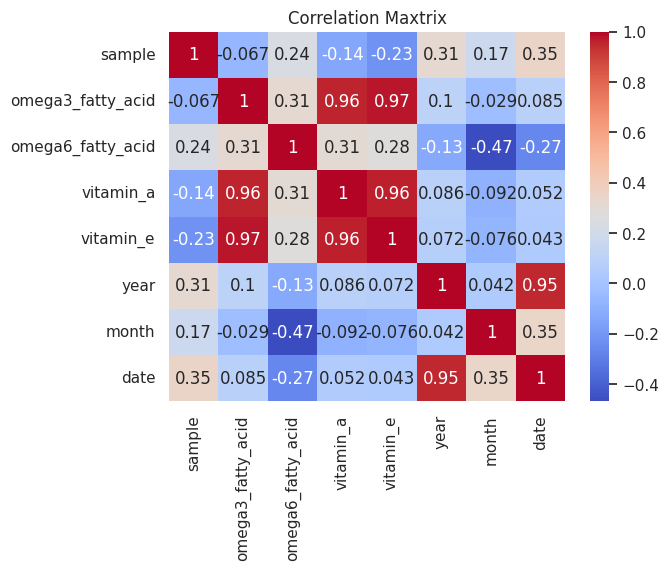

In [13]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Maxtrix')
plt.show()

# Informe y presentación de resultados

report = pd.DataFrame({...}) se utiliza para crear un DataFrame llamado report que resume los resultados de varios análisis realizados en los datos. Permíteme explicarte en detalle cada parte de esta línea:

'Statistics': statistics.loc['mean'] crea una columna llamada "Statistics" en el DataFrame report y asigna los valores de la fila "mean" de la variable statistics. Esta línea extrae las estadísticas de promedio (mean) para cada columna del DataFrame original y las agrega al informe.

'Comparison': comparison crea otra columna llamada "Comparison" en el DataFrame report y asigna los valores de la variable comparison. Aquí, comparison es un objeto que contiene el promedio de las columnas "protein" y "fat" del DataFrame original. Esto se calculó previamente utilizando df[['omega3_fatty_acid', 'omega6_fatty_acid']].mean().

'Correlation Omega3 vs Omega6': correlation_matrix.loc['omega3_fatty_acid', 'omega6_fatty_acid'] crea una tercera columna llamada "Correlation Protein vs Fat" en el DataFrame report y asigna el valor de correlación entre las variables "protein" y "fat" de la matriz de correlación (correlation_matrix). Esta línea extrae específicamente el valor de correlación entre esas dos variables.

In [23]:
report = pd.DataFrame({
    'Statistics': statistics.loc['mean'],
    'Comparison': comparison,
    'Correlation Omega 3 vs Omega 6': correlation_matrix.loc['omega3_fatty_acid', 'omega6_fatty_acid']
})
report

,Statistics,Comparison,Correlation Omega 3 vs Omega 6
sample,8.0,8.0,0.314942
omega3_fatty_acid,11.946667,11.946667,0.314942
omega6_fatty_acid,5.046667,5.046667,0.314942
vitamin_a,111.933333,111.933333,0.314942
vitamin_e,13.333333,13.333333,0.314942
year,2022.133333,2022.133333,0.314942
month,6.533333,6.533333,0.314942
date,2022-08-05 04:48:00,2022-08-05 04:48:00,0.314942
